# Unsupervised Learning via Clustering

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Generate data

In [3]:
from sklearn.datasets import make_blobs

x, y = make_blobs(random_state=42)

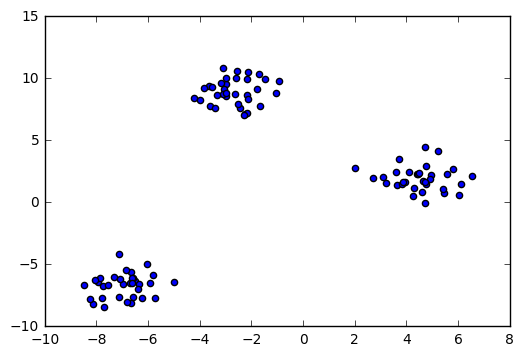

In [6]:
plt.scatter(x[:, 0], x[:, 1])

Here we use a nicely seperated dataset to illustrate how effective a clustering algorithm can be.

## K-Means Clustering

Since we know that there are 3 seperate groups from the above plot, let's use this value as the number of clusters required.

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

labels = kmeans.fit_predict(x)

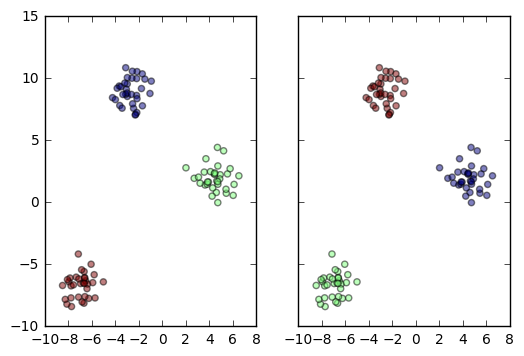

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.scatter(x[:, 0], x[:, 1], c=y, alpha=0.5)
ax2.scatter(x[:, 0], x[:, 1], c=labels, alpha=0.5)

## Evaluating the algorithm

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Accuracy Score: {}".format(accuracy_score(y, labels)))
print(confusion_matrix(y, labels))

Accuracy Score: 0.0
[[ 0  0 34]
 [33  0  0]
 [ 0 33  0]]


### Why is the accuracy score 0.0?

From the side-by-side plot, it is evident that although the algorithm accurately predicts the clusters, the permutation of classes is different. Let's remedy that by using a metric that is insensitive to the order of permutation:

In [29]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, labels)

1.0

Much Better.

## What happens when we change the no of clusters?

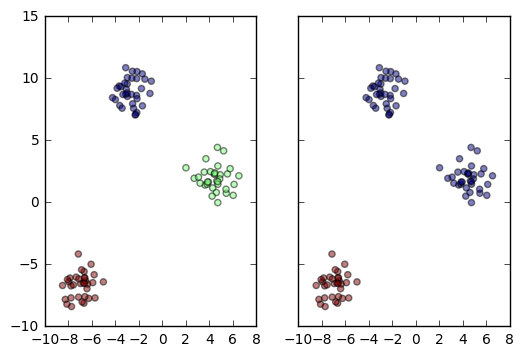

In [31]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(x)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.scatter(x[:, 0], x[:, 1], c=y, alpha=0.5)
ax2.scatter(x[:, 0], x[:, 1], c=labels, alpha=0.5)

## Using 'Elbow Method' for selecting an optimal value for K

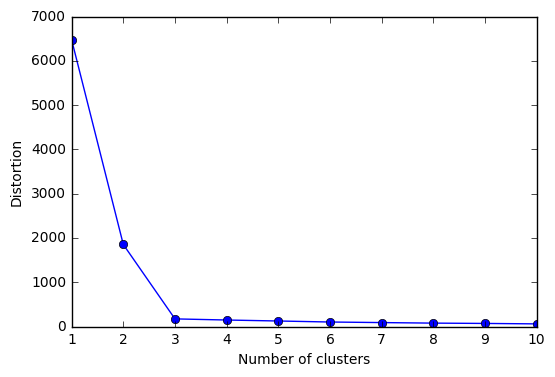

In [33]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                random_state=0)
    km.fit(x)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

The optimal value would be the tip of the elbow viz. **k=3**.

---

*NOTE: A clustering algorithm finds clusters by making assumptions about which samples should be grouped together. Each algorithm makes different assumptions and the quality and interpretability of your results will depend on whether the assumptions are satisfied for your goal. For K-means clustering, the model is that all clusters have equal, spherical variance.*

---